분류에 사용되는 성능 평가 지표

 - 정확도
 - 오차행렬
 - 정밀도
 - 재현률
 - F1스코어
 - ROC AUC
 
 
 긍정/부정과 같은 2개의 결과값을 가지는 이진분류와 여러개의 결정클래스 값을 가지는 멀티 분류 모두 적용되는 평가 지표

### 정확도

실제 데이터에서 예측 데이터가 얼마나 같은지를 판단하는 지표

직관적으로 모델 예측 성능을 나타냄

In [1]:
from sklearn.base import BaseEstimator
import numpy as np

class MyDummyClassifier(BaseEstimator):
    def fit(self, X, y=None):
        pass
    #fit 메서드는 아무것도 학습하지 않음
    
    def predict(self,X):
        pred = np.zeros((X.shape[0],1))
        for i in range(X.shape[0]):
            if X['Sex'].iloc[i]==1:
                pred[i]=0
            else:
                pred[i]=1
        return pred

In [2]:
# 데이터 준비
import pandas as pd

data = {'Sex': [1, 0, 1, 0, 1, 0],
        'OtherFeature': [2.5, 3.2, 1.8, 2.7, 2.0, 3.5]}
df = pd.DataFrame(data)

# 분류기 생성 및 예측
dummy_classifier = MyDummyClassifier()
predictions = dummy_classifier.predict(df)

print(predictions.reshape(-1))

[0. 1. 0. 1. 0. 1.]


In [3]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.base import BaseEstimator
from sklearn.metrics import accuracy_score

In [4]:
class MyDummyClassifier(BaseEstimator):
    def fit(self, X,y):
        pass
    def predict(self,X):
        return np.zeros((len(X),1), dtype=bool)
    
digits = load_digits()

y = (digits.target==7).astype(int)
train_input, test_input, train_target, test_target = train_test_split(digits.data, y, random_state=11)

print('레이블 세트 크기: ', test_target.shape)
print('테스트 세트 레이블 0과 1의 분포도')
print(pd.Series(test_target).value_counts())

레이블 세트 크기:  (450,)
테스트 세트 레이블 0과 1의 분포도
0    405
1     45
dtype: int64


In [5]:
clf = MyDummyClassifier()
clf.fit(train_input, train_target)
pred = clf.predict(test_input)
score = accuracy_score(pred, test_target)
print('모든 예측을 0으로 할 경우의 정확도: {0:.3f}'.format(score))

모든 예측을 0으로 할 경우의 정확도: 0.900


## 오차행렬

학습된 분류 모델이 예측을 수행하며 얼마나 헷갈리고있는지 함께 보여주는 지표

예측 오류가 얼마인지와 더불어 어떠한 유형의 예측 오류가 발생하고 있는지 함께 나타냄

TN/FN/TP/FP

confusion_matrix()

In [6]:
from sklearn.metrics import confusion_matrix

confusion_matrix(test_target, pred)

array([[405,   0],
       [ 45,   0]], dtype=int64)

예측: 7이 아닌 Digit

7이 아닌 Digit(TN) 405

7인 경우(FN) 45

이 값을  조합해 Classifier의 성능을 측정할 수 있는 지표인 정확도, 정밀도, 재현도를 측정할 수 있다

**정확도 = (TP + TN) / (TP + TN + FP + FN)**

## 정밀도와 재현율

positive 데이터 세트의 예측 성능에 초점을 맞춘 평가 지표

**정밀도 = TP / (FP + TP)**

Positive 예측 성능을 더욱 정밀하게 측정하기 위한 평가 지표 (presicion_score())

**재현율 = TP / (FN + TP)**

예측과 실제값이 Positive로 일치한 데이터 건수 (recall_score())

재현율이 중요한 경우 : 실제 Positive 양성 데이터를 Negative로 잘못 판단하게 되면 업무상 큰 영향이 발생하는 경우

정밀도가 중요한 경우 : 실제 Negative인 음성 데이터를 Positive로 잘못 판단하게 되어 업무상 큰 영향이 발생하는 경우

get_clf_eval() = matrix, accuracy, precision, recall의 평가를 한꺼번에 호출

In [7]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix

def get_clf_eval(test_target, pred):
    confusion = confusion_matrix(test_target, pred)
    accuracy = accuracy_score(test_target, pred)
    precision = accuracy_score(test_target, pred)
    recall = recall_score(test_target, pred)
    print('오차행렬')
    print(confusion)
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f}'.format(accuracy, precision, recall))

In [8]:
from sklearn.linear_model import LogisticRegression

train = pd.read_csv('C:/Users/qkrwo/머신러닝/datasets/train.csv')
test = pd.read_csv('C:/Users/qkrwo/머신러닝/datasets/test.csv')

In [9]:
train_s = train['Survived']
train = train.drop('Survived', axis=1)

In [10]:
train.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [11]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Pclass       891 non-null    int64  
 2   Name         891 non-null    object 
 3   Sex          891 non-null    object 
 4   Age          714 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Ticket       891 non-null    object 
 8   Fare         891 non-null    float64
 9   Cabin        204 non-null    object 
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 76.7+ KB


In [12]:
from sklearn.preprocessing import LabelEncoder

def fillna(df):
    df['Age'].fillna(df['Age'].mean(), inplace=True)
    df['Cabin'].fillna('N', inplace=True)
    df['Embarked'].fillna('N', inplace=True)
    return df

def label(df):
    features = ['Sex', 'Cabin', 'Embarked']
    for feature in features:
        le = LabelEncoder()
        le.fit(df[feature])
        df[feature]= le.transform(df[feature])
    return df

def drop(df):
    df.drop(['PassengerId', 'Name', 'Ticket'], axis=1, inplace=True)
    return df

def transform_feature(df):
    df = fillna(df)
    df = label(df)
    df = drop(df)
    return df

In [13]:
train = transform_feature(train)

In [14]:
train.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,3,1,22.0,1,0,7.2500,146,3
1,1,0,38.0,1,0,71.2833,81,0
2,3,0,26.0,0,0,7.9250,146,3
3,1,0,35.0,1,0,53.1000,55,3
4,3,1,35.0,0,0,8.0500,146,3


In [15]:
train_input, test_input, train_target, test_target = train_test_split(train, train_s, test_size=0.2, random_state=11)

In [16]:
lr = LogisticRegression(solver='liblinear')
lr.fit(train_input, train_target)

pred = lr.predict(test_input)
get_clf_eval(test_target, pred)

오차행렬
[[108  10]
 [ 16  45]]
정확도: 0.8547, 정밀도: 0.8547, 재현율: 0.7377


## 정밀도/재현율 트레이드 오프

분류의 특성상 정밀도 또는 재현율이 강조되어야 할 경우 임계값을 조정해 정밀도 또는 재현율의 수치를 높일 수 있다.

정밀도와 재현율은 상호 보완적인 지표이기 때문에 어느 한 쪽을 강제로 높이면 다른 하나의 수치는 떨어지기 쉽다

predict_proba()

In [17]:
pred_proba = lr.predict_proba(test_input)
pred = lr.predict(test_input)
print('pred_proba 결과 shape', pred_proba.shape)
pred_proba[:3]

pred_proba 결과 shape (179, 2)


array([[0.45394788, 0.54605212],
       [0.86558995, 0.13441005],
       [0.86569829, 0.13430171]])

In [18]:
pred_proba_result = np.concatenate([pred_proba, pred.reshape(-1,1)], axis=1)
pred_proba_result[:5]

array([[0.45394788, 0.54605212, 1.        ],
       [0.86558995, 0.13441005, 0.        ],
       [0.86569829, 0.13430171, 0.        ],
       [0.83841241, 0.16158759, 0.        ],
       [0.80860496, 0.19139504, 0.        ]])

In [19]:
from sklearn.preprocessing import Binarizer

X = [[1,-1,2],
    [2,0,0],
    [0,1.1,1.2]]

binarizer = Binarizer(threshold=1.1)
binarizer.fit_transform(X)

array([[0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.]])

입력된 데이터 세트 X에서 Binarizer의 threshold값이 1.1보다 같거나 작으면 0, 크면 1로 변환

In [20]:
custom_threshold = 0.5

pred_proba_1 = pred_proba[:,1].reshape(-1,1)

binarizer = Binarizer(threshold = custom_threshold).fit(pred_proba_1)
custom_predict = binarizer.transform(pred_proba_1)

get_clf_eval(test_target, custom_predict)

오차행렬
[[108  10]
 [ 16  45]]
정확도: 0.8547, 정밀도: 0.8547, 재현율: 0.7377


In [23]:
custom_threshold=0.4

pred_proba_1 = pred_proba[:,1].reshape(-1,1)

binarizer = Binarizer(threshold = custom_threshold).fit(pred_proba_1)
custom_predict = binarizer.transform(pred_proba_1)

get_clf_eval(test_target, custom_predict)

오차행렬
[[98 20]
 [11 50]]
정확도: 0.8268, 정밀도: 0.8268, 재현율: 0.8197


임곗값을 낮추니 재현율 값이 올라가고 정밀도가 떨어짐

확률이 0.5가 아닌 0.4부터 Positive로 예측하니 True값이 늘기 때문

분류 결정 임곗값은 Positivs 예측값을 결정하는 확률의 기준이 됨

In [53]:
threshold = [0.4, 0.45, 0.5, 0.55, 0.6]

def get_eval_by_threshold(test_target, predict_proba, threshold):
    for custom_threshold in threshold:
        binarizer = Binarizer(threshold = custom_threshold).fit(predict_proba)
        custom_predict = binarizer.transform(predict_proba)
        print('임곗값: ', custom_threshold)
        get_clf_eval(test_target, custom_predict)

get_eval_by_threshold(test_target, pred_proba[:,1].reshape(-1,1), threshold)

임곗값:  0.4
오차행렬
[[98 20]
 [11 50]]
정확도: 0.8268, 정밀도: 0.8268, 재현율: 0.8197, F1: 0.7634
임곗값:  0.45
오차행렬
[[106  12]
 [ 14  47]]
정확도: 0.8547, 정밀도: 0.8547, 재현율: 0.7705, F1: 0.7833
임곗값:  0.5
오차행렬
[[108  10]
 [ 16  45]]
정확도: 0.8547, 정밀도: 0.8547, 재현율: 0.7377, F1: 0.7759
임곗값:  0.55
오차행렬
[[111   7]
 [ 17  44]]
정확도: 0.8659, 정밀도: 0.8659, 재현율: 0.7213, F1: 0.7857
임곗값:  0.6
오차행렬
[[113   5]
 [ 18  43]]
정확도: 0.8715, 정밀도: 0.8715, 재현율: 0.7049, F1: 0.7890


In [34]:
from sklearn.metrics import precision_recall_curve

pred_proba = lr.predict_proba(test_input)[:,1]

precisions, recalls, thresholds = precision_recall_curve(test_target, pred_proba)
print('thresholds shape: ', thresholds.shape)

thr_index = np.arange(0,thresholds.shape[0],15)
print(thr_index)
print('11개 임곗값', np.round(thresholds[thr_index],2))

print('정밀도: ', np.round(precisions[thr_index],3))
print('재현도: ', np.round(recalls[thr_index],3))

thresholds shape:  (165,)
[  0  15  30  45  60  75  90 105 120 135 150]
11개 임곗값 [0.02 0.11 0.13 0.14 0.17 0.25 0.32 0.44 0.61 0.73 0.87]
정밀도:  [0.341 0.372 0.401 0.44  0.505 0.598 0.675 0.774 0.915 0.968 1.   ]
재현도:  [1.    1.    0.967 0.902 0.902 0.902 0.852 0.787 0.705 0.492 0.262]


#### 시각화

In [36]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
%matplotlib inline

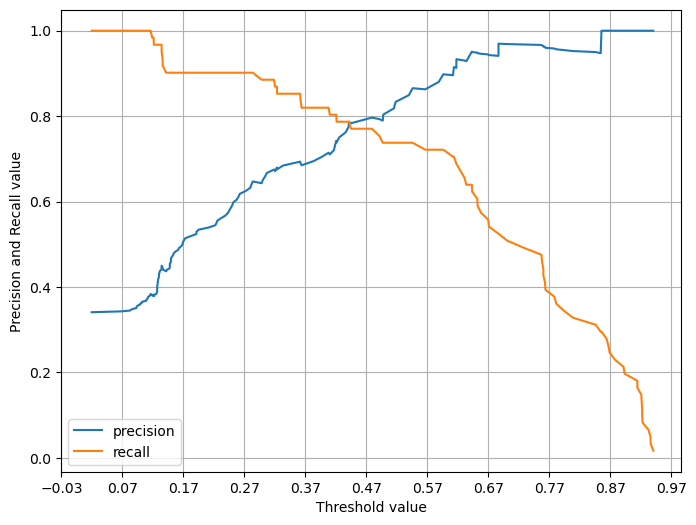

In [46]:
def precision_recall_curve_plot(test_target, pred_proba):
    precisions, recalls, thresholds = precision_recall_curve(test_target, pred_proba)
    
    plt.figure(figsize=(8,6))
    threshold_boundary = thresholds.shape[0]
    plt.plot(thresholds, precisions[0:threshold_boundary], linestyle='-', label='precision')
    plt.plot(thresholds, recalls[0:threshold_boundary], label='recall')
    
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1),2))
    
    plt.xlabel('Threshold value'); plt.ylabel('Precision and Recall value')
    plt.legend(); plt.grid()
    plt.show()
    
precision_recall_curve_plot(test_target, lr.predict_proba(test_input)[:,1])

## F1 스코어

정밀도와 재현율을 결합한 지표

정밀도와 재현율이 어느 한 쪽으로 치우치지 않는 수치를 나타낼 때 상대적으로 높은 값을 가짐

f1_score()

In [48]:
from sklearn.metrics import f1_score

f1 = f1_score(test_target, pred)
np.round(f1, 4)

0.7759

In [50]:
def get_clf_eval(test_target, pred):
    confusion = confusion_matrix(test_target, pred)
    accuracy = accuracy_score(test_target, pred)
    precision = accuracy_score(test_target, pred)
    recall = recall_score(test_target, pred)
    print('오차행렬')
    print(confusion)
    
    f1 = f1_score(test_target, pred)
    
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f}, F1: {3:.4f}'.format(accuracy, precision, recall,  f1))
    
thresholds = [0.4,0.45,0.5,0.55,0.6]
pred_proba = lr.predict_proba(test_input)
get_eval_by_threshold(test_target, pred_proba[:,1].reshape(-1,1), thresholds)

임곗값:  0.4
오차행렬
[[98 20]
 [11 50]]
정확도: 0.8268, 정밀도: 0.8268, 재현율: 0.8197, F1: 0.7634
임곗값:  0.45
오차행렬
[[106  12]
 [ 14  47]]
정확도: 0.8547, 정밀도: 0.8547, 재현율: 0.7705, F1: 0.7833
임곗값:  0.5
오차행렬
[[108  10]
 [ 16  45]]
정확도: 0.8547, 정밀도: 0.8547, 재현율: 0.7377, F1: 0.7759
임곗값:  0.55
오차행렬
[[111   7]
 [ 17  44]]
정확도: 0.8659, 정밀도: 0.8659, 재현율: 0.7213, F1: 0.7857
임곗값:  0.6
오차행렬
[[113   5]
 [ 18  43]]
정확도: 0.8715, 정밀도: 0.8715, 재현율: 0.7049, F1: 0.7890


## ROC 곡선과 AUC

ROC곡선은 FPR(False Positive Rate)이 변할 때  TPR(True Positive Rate, 재현율)이 어떻게 변하는지 나타내는 곡선

그리고 재현율에 대응하는 지표로 TNR(True Negative Rate, 특이성)이 있다

 - TPR은 실제값 Positive(양성)가 정확히 예측되어야 하는 수준을 나타냄
 - TNR은 실제값 Negative(음성)가 정확히 예측되어야 하는 수준을 나타냄
 
**TNR = TN / (FP + TN)**

**FPR = FP / (FP + TN) = 1 - TNR = 1 - 특이성**

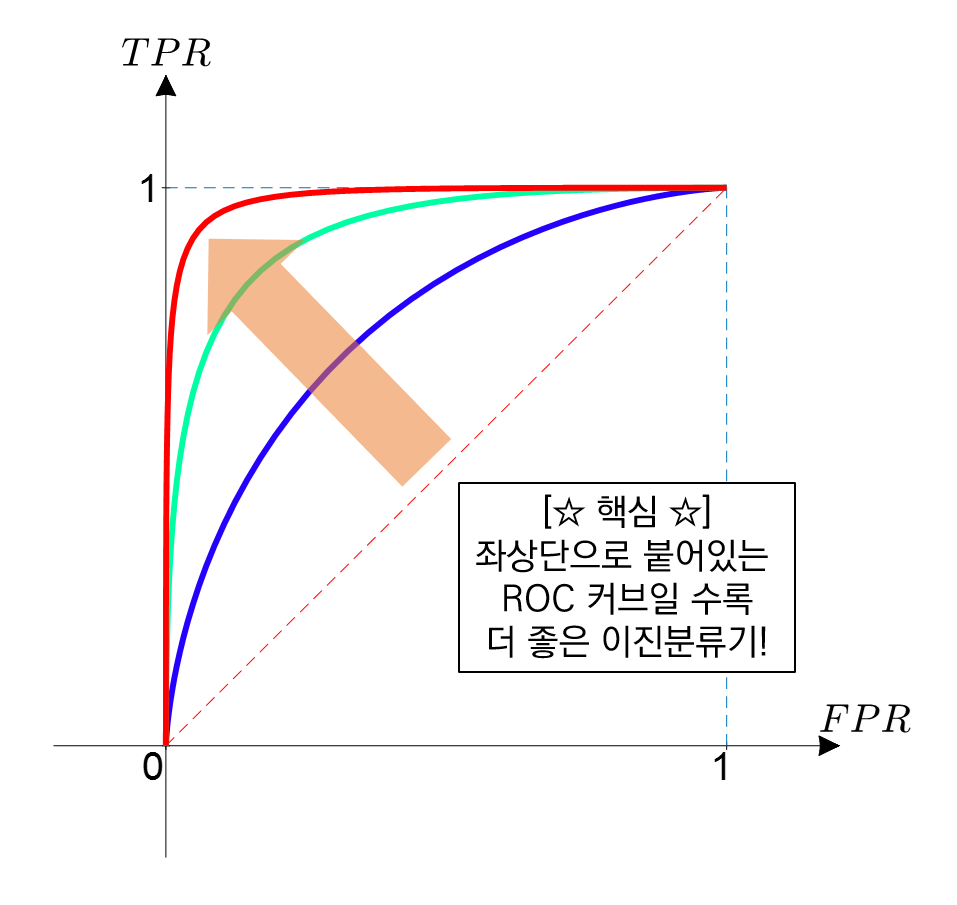

가운데 직선은 ROC곡선의 최저값으로 ROC곡선이 가운데 직선에 가까울수록 성능이 떨어지는 것이며, 멀수록 성능이 뛰어난 것이다

ROC곡선은 FPR을 0부터 1까지 변경하면서 TPR의 변화값을 구함 (분류 결정 임곗값을 이용)

임곗값은 Positive 예측값을 결정하는 확률의 기준이기 때문에 FPR을 0으로 만들기 위해서는 임곗값을 1로 지정하면 된다

임곗값을 1로 지정하면 Positive 예측 기준이 매우 높기 때문에 분류기가 임곗값보다 높은 확률을 가진 데이터를 Positive로 예측할 수 없기 때문

임곗값을 0으로 지정하면 TN이 0이되어 FPR을 1로 설정할 수 있다

roc_curve()

In [60]:
from sklearn.metrics import roc_curve

pred_proba = lr.predict_proba(test_input)[:,1]

fprs, tprs, thresholds = roc_curve(test_target, pred_proba)

thr_index = np.arange(1,thresholds.shape[0],5)

print('샘플 추출을 위한 임곗값 배열의 index: ', thr_index)
print('샘플 index로 추출한 임곗값: ', np.round(thresholds[thr_index], 2))

print('샘플 임곗값별 FPR: ', np.round(fprs[thr_index], 3))
print('샘플 임곗값별 TPR: ', np.round(tprs[thr_index], 3))

샘플 추출을 위한 임곗값 배열의 index:  [ 1  6 11 16 21 26 31 36 41 46 51]
샘플 index로 추출한 임곗값:  [0.94 0.69 0.62 0.57 0.44 0.36 0.32 0.15 0.13 0.13 0.02]
샘플 임곗값별 FPR:  [0.    0.008 0.025 0.059 0.11  0.195 0.22  0.534 0.619 0.78  1.   ]
샘플 임곗값별 TPR:  [0.016 0.525 0.689 0.721 0.787 0.82  0.885 0.902 0.967 0.967 1.   ]


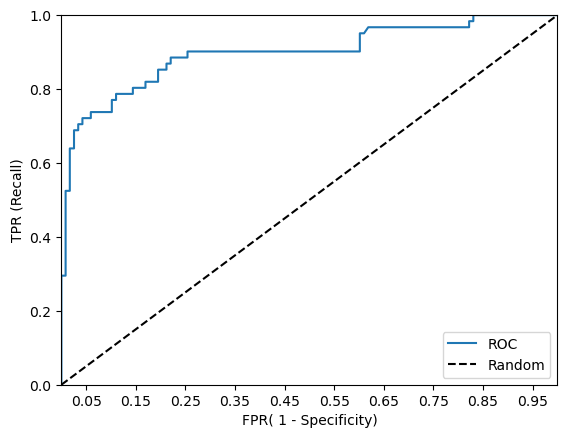

In [65]:
def roc_curve_plot(test_target, pred_proba):
    fprs, tprs, thresholds = roc_curve(test_target, pred_proba)
    
    plt.plot(fprs, tprs, label='ROC')
    plt.plot([0,1], [0,1], 'k--', label='Random')
    
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1),2))
    plt.xlim(0,1); plt.ylim(0,1)
    plt.xlabel('FPR( 1 - Specificity)'); plt.ylabel('TPR (Recall)')
    plt.legend()
    
roc_curve_plot(test_target, pred_proba)

In [66]:
from sklearn.metrics import roc_auc_score

pred_proba = lr.predict_proba(test_input)[:,1]
roc_score = roc_auc_score(test_target, pred_proba)
print('ROC AUC 값: {0:.4f}'.format(roc_score))

ROC AUC 값: 0.8980
